# Installing and importing required libraries

In [1]:
# Installing necessary packages
!pip install tf-keras-vis tensorflow
!pip install visualkeras
!pip install tensorflow
!pip install numpy
!pip install matplotlib
!pip install Pillow
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 KB 41.8 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:01:010m
  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.7 MB)
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.2/993.2 KB 578.3 kB/s eta 0:00:00m eta 0:00:010:00:01
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached contourpy-1.0.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (295 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01


In [1]:
import warnings
warnings.filterwarnings("ignore")

import shutil
import os

import glob

from PIL import Image
from PIL import ImageFilter

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.gradcam import Gradcam
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.utils import load_img

2022-10-31 11:09:47.357374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 11:09:54.264741: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-31 11:10:03.344627: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-31 11:10:03.344773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

### Defining main folder

In [3]:
main_dir='/home/ishu/ishan/glenda_app/Glenda-ml-model/GLENDA'

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-10-31 11:12:31.833633: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 11:12:32.501511: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 11:12:34.729307: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 11:12:34.729816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

True

In [5]:
tf.test.is_built_with_cuda()

True

## For google drive

In [19]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
os.chdir(main_dir)

In [8]:
!cd "$main_dir"

In [ ]:
!unzip GLENDA

In [ ]:
!unzip Glenda_v1.5_classes.zip


## Copying files to main data folder

In [ ]:
!mkdir "$main_dir"/data/

In [ ]:
!mkdir "$main_dir"/data/no_pathology


In [ ]:
!rm -rf "$main_dir"/data/pathology


In [ ]:
shutil.copytree(main_dir+'/Glenda_v1.5_classes/frames/', main_dir+'/data/pathology/')

'/content/drive/MyDrive/GLENDA/data/pathology/'

In [ ]:
!rm -rf "$main_dir"/data/no_pathology

#### Copying original no_pathology dataset to main data folder

In [ ]:
frame_list=os.listdir(main_dir+'/no_pathology/frames')

In [ ]:

src_dir=main_dir+'/no_pathology/frames'
dest_dir=main_dir+'/data/no_pathology'
count=0
for frame in frame_list:

  final_src_dir=os.path.join(src_dir,frame)
  img_list=os.listdir(final_src_dir)
  for img in img_list:
    # print(os.path.splitext(img)[0])
    final_img_src_dir=os.path.join(final_src_dir,img)
    final_img_dest_dir=os.path.join(dest_dir, img)
    
    if os.path.exists(final_img_dest_dir):
      final_img_dest_dir=os.path.splitext(final_img_dest_dir)[0]+str(count)+".jpg"
      

    shutil.move(final_img_src_dir, final_img_dest_dir)

  count+=1


# ***DATA PREPROCESSING***

## Oversampling pythological dataset

In [ ]:
filelist = glob.glob(main_dir+'/data/pathology/*.jpg')
for count in range(0,3):
  # imagefile
  os.chdir(main_dir+"/data/pathology")
  for imagefile in filelist:
    im=Image.open(imagefile)
    im=im.convert("RGB")
    im_enhance = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
    im_unsharp = im.filter(ImageFilter.UnsharpMask)
    im_median = im.filter(ImageFilter.MedianFilter)
    im_blur = im.filter(ImageFilter.BLUR)
    im_min = im.filter(ImageFilter.MinFilter)
    im_max = im.filter(ImageFilter.MaxFilter)
    im_mode = im.filter(ImageFilter.ModeFilter)
    im_sharp = im.filter(ImageFilter.SHARPEN)
    im_smooth = im.filter(ImageFilter.SMOOTH)
    base_name=os.path.basename(os.path.splitext(imagefile)[0])
    im_enhance.save(base_name+str(count)+'_enh.jpg')
    im_unsharp.save(base_name+str(count)+'_us.jpg')
    im_median.save(base_name+str(count)+'_me.jpg')
    im_blur.save(base_name+str(count)+'_blur.jpg')
    im_min.save(base_name+str(count)+'_min.jpg')
    im_max.save(base_name+str(count)+'_max.jpg')
    im_mode.save(base_name+str(count)+'_mode.jpg')
    im_sharp.save(base_name+str(count)+'_sharp.jpg')
    im_smooth.save(base_name+str(count)+'_smooth.jpg')



### Looking at the data

In [6]:
data=tf.keras.utils.image_dataset_from_directory(main_dir+"/data/")


Found 23214 files belonging to 2 classes.


2022-10-31 11:13:13.235320: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 11:13:13.235649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 11:13:13.235880: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 11:13:13.236526: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 11:13:13.236897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

In [5]:
steps= data.as_numpy_iterator()

In [6]:
batch=steps.next()

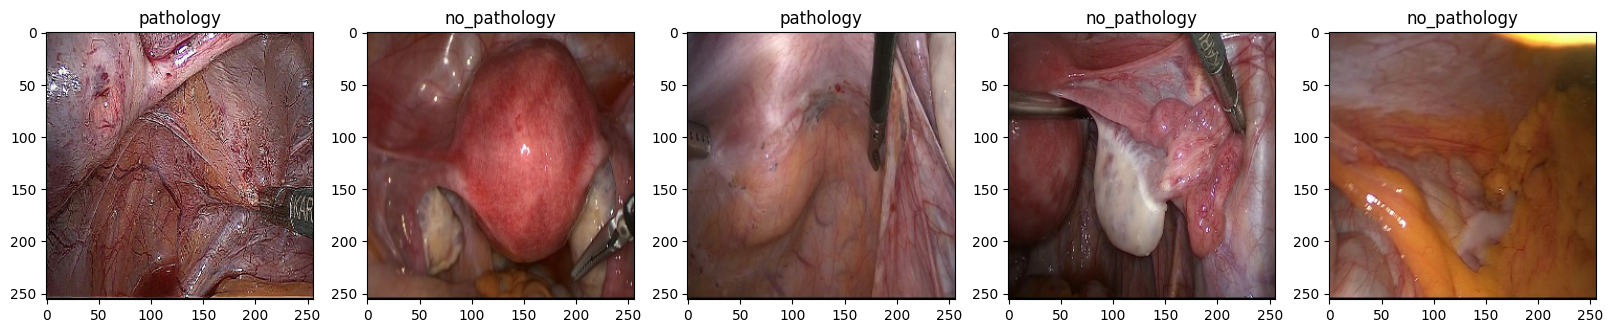

In [7]:
fig, ax=plt.subplots(ncols=5, figsize=(20,20))
classes=['no_pathology','pathology']
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(classes[batch[1][idx]])



> Note:  

*    0- no_pathology
*    1-pathology


## **Scaling the dataset**

In [7]:
data = data.map(lambda x,y: (x/255,y))

In [9]:
scaled_iter= data.as_numpy_iterator()


In [10]:
batch=scaled_iter.next()

In [11]:
batch[0].max()

1.0

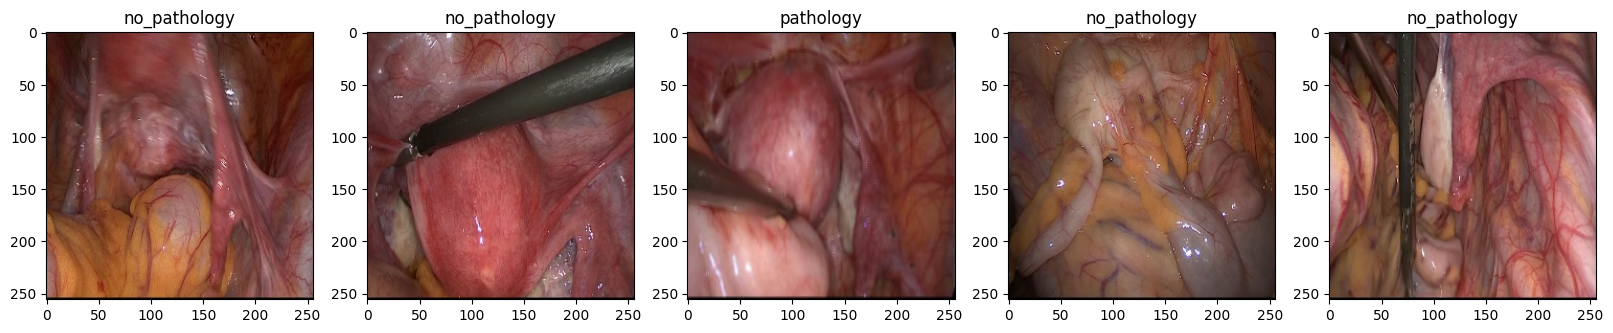

In [12]:
fig, ax=plt.subplots(ncols=5, figsize=(20,20))
classes=['no_pathology','pathology']
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(classes[batch[1][idx]])

## **Splitting the dataset**

In [13]:
len(data)

726

In [8]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [9]:
#using take and skip method from image_dataset_from_directory for splitting the dataset

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)

In [9]:
len(train), len(val), len(test)

(508, 145, 73)

# ***DEEP LEARNING***

## Sequential Custom

In [10]:
# Creating the custom model
sequential_model= Sequential()

# Adding the layers
sequential_model.add(Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid", input_shape=(256,256,3)))
sequential_model.add(Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid"))
sequential_model.add(MaxPool2D(pool_size=(2,2)))

sequential_model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="valid"))
sequential_model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="valid"))
sequential_model.add(MaxPool2D(pool_size=(2,2)))

sequential_model.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="valid"))
sequential_model.add(MaxPool2D(pool_size=(2,2)))

sequential_model.add(Conv2D(256, kernel_size=(3,3), activation="relu", padding="valid"))
sequential_model.add(MaxPool2D(pool_size=(2,2)))

sequential_model.add(Conv2D(512, kernel_size=(3,3), activation="relu", padding="valid"))
sequential_model.add(MaxPool2D(pool_size=(2,2)))

sequential_model.add(Flatten())
sequential_model.add(Dense(64, activation='relu'))

# Output layer
sequential_model.add(Dense(1, activation='sigmoid'))

# Viewing the summary of the model
sequential_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                    

In [11]:
# Compiling the model
sequential_model.compile(loss=tf.losses.BinaryCrossentropy(), optimizer='adam', metrics=["accuracy"])

## Training

In [13]:
#for logging of our model
logsdir="logs"

In [14]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logsdir)
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [15]:
sequential_model.fit(train, validation_data=val, callbacks=[tensorboard_callback, early_stop], epochs=20, workers=8)



Epoch 1/20


2022-10-31 11:17:09.203423: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-10-31 11:17:21.470541: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-10-31 11:17:23.213228: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.20GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-10-31 11:17:23.244469: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.20GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-10-31 11:17:30.396312: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to al

508/508 [==============================] - 580s 1s/step - loss: 0.6683 - accuracy: 0.5835 - val_loss: 0.6768 - val_accuracy: 0.5737
Epoch 2/20
508/508 [==============================] - 532s 1s/step - loss: 0.5529 - accuracy: 0.6935 - val_loss: 0.4723 - val_accuracy: 0.7597
Epoch 3/20
508/508 [==============================] - 603s 1s/step - loss: 0.2424 - accuracy: 0.8938 - val_loss: 0.1278 - val_accuracy: 0.9522
Epoch 4/20
508/508 [==============================] - 524s 1s/step - loss: 0.0876 - accuracy: 0.9663 - val_loss: 0.0892 - val_accuracy: 0.9700
Epoch 5/20
131/508 [======>.......................] - ETA: 2:48 - loss: 0.0605 - accuracy: 0.9807

KeyboardInterrupt: 

In [ ]:
#saving model
sequential_model.save(os.path.join('models', 'sequential1.h5'))

In [10]:
#loading the saved model
sequential_model = load_model(main_dir+"/models/sequential.h5")

## *Viewing model performance*

In [11]:
fig=plt.figure()
plt.plot(hist.history['loss'], color="teal", label="train loss")
plt.plot(hist.history['val_loss'], color="orange", label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
fig.suptitle("Loss per epoch")
plt.legend(loc="best", fontsize=20)
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
fig=plt.figure()
plt.plot(hist.history['accuracy'], color="teal", label="train accuracy")
plt.plot(hist.history['val_accuracy'], color="orange", label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
fig.suptitle("accuracy per epoch")
plt.legend(loc="best", fontsize=20)
plt.show()

In [12]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [13]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = sequential_model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 1s 677ms/step


In [14]:
print(f'Precision: {pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}')

Precision: 0.9914853572845459, Recall: 0.9980952143669128, Accuracy: 0.9952545166015625


# Testing Model

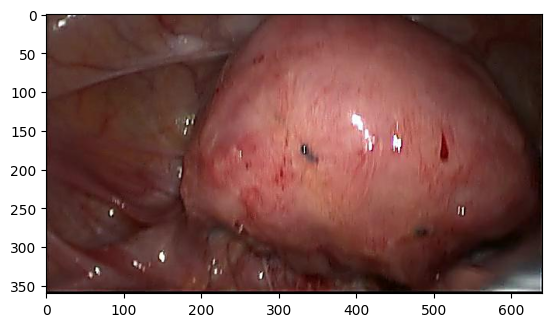

In [16]:
image1=load_img(main_dir+'/data/pathology/c_100_v_(video_3062.mp4)_f_14580_us.jpg')
plt.imshow(image1)
plt.show()

In [17]:
img_np_array=np.asarray(image1)

In [18]:
resize=tf.image.resize(img_np_array,(256,256))

In [19]:
yhat=sequential_model.predict(np.expand_dims(resize/255,0))
yhat

1/1 [==============================] - 0s 89ms/step


array([[0.91245717]], dtype=float32)

In [20]:
if yhat>0.5:
  print('Pathology detected')
else:
  print('no pathology detected')

Pathology detected
